# Power Production

### Brief 
Create a web service that uses machine learning to make predictions based on the data set powerproduction.The goal is to
produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

In [23]:
%%time
# Magic Command that Displays Cell/Wall Times. Useful for Optimisation.

# Import packages.
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
# import tensorflow.keras as kr

%matplotlib inline

# Import and Display Speed & Power Values.
ds = pd.read_csv("./powerproduction.csv", delimiter = ',')
print (ds)
print(ds.shape)


      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]
(500, 2)
Wall time: 4 ms


#### An Overview of the Data.

In [24]:
%%time

# A General Overview of Pertainent Statistics.
ds.describe(include = 'all') 

Wall time: 3.5 ms


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [25]:
# A Sample of Values from the Dataset.
ds.sample(15)
# This Displays Random Entries' Index Number, Speed Value and Power Value.

,speed,power
437,22.072,99.460
414,20.521,94.980
411,20.320,100.699
265,13.388,62.315
346,17.442,85.533
439,22.222,96.650
164,8.083,5.385
327,16.667,92.753
499,25.000,0.000
462,23.298,96.337


## Model Training Function



Now we put the speed and power values into arrays to use in training and testing.

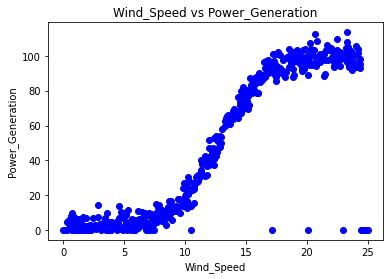

In [26]:
# https://machinelearningmastery.com/make-predictions-scikit-learn/

X = np.array(ds[['speed']]) # Speed Values Stored as X.
Y = np.array(ds[['power']]) # Power Values Stored as Y.

x = np.reshape(-1, 1)

plt.scatter(X,Y,color="blue") # Plot a graph with X(Wind Speed) vs Y(Power Generation).
plt.title('Wind_Speed vs Power_Generation')
plt.xlabel('Wind_Speed')
plt.ylabel('Power_Generation')
plt.show()

Here we create an "X" and "Y" dataset for "X_train", "X_test" and "Y_train", "Y_test". Here we set 25% of the data as the test dataset and use the remaining for the training dataset. We create regressor then we fit "X_train" and "Y_train" into the regressor model.



In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state=15) # Creating Training & Testing Dataset.
regressor = LinearRegression() # Creating a Regressor.
regressor.fit(X_train,Y_train) # Fitting the Dataset into the Model.

LinearRegression()

Now we Display the Test Dataset (X_test and Y_test datasets) and draw the Regression Line.

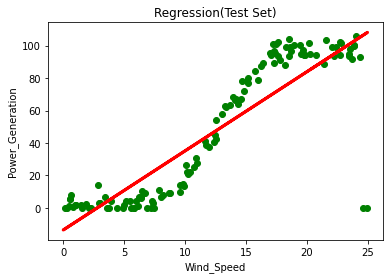

In [28]:
plt.scatter(X_test,Y_test,color="green") # Plotting a Graph with X_test vs Y_test
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressor Line Displayed
plt.title('Regression(Test Set)')
plt.xlabel('Wind_Speed')
plt.ylabel('Power_Generation')
plt.show()

Now we Display the Training Datasets (X_test and Y_test datasets) and draw the Regression Line.

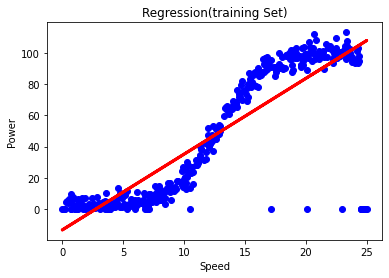

In [29]:
plt.scatter(X_train,Y_train,color="blue") # Plot a Graph with X_train vs Y_train
plt.plot(X_train,regressor.predict(X_train),color="red",linewidth=3) # Regressor Line Displayed
plt.title('Regression(training Set)')
plt.xlabel('Wind_Speed')
plt.ylabel('Power_Generation')
plt.show()

In [30]:
Y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(Y_test,Y_pred)) # R2 Score

R2 score: 0.77


In [31]:
print('Mean Error :',mean_squared_error(Y_test,Y_pred)) # The Mean Error

Mean Error : 395.5013388224634


In [32]:
def power_gen(power): # A function to predict the power generation according to wind speed
    result = regressor.predict(np.array(power).reshape(1, -1))
    return(result[0,0])

In [33]:
wind_speed = float(input('Enter Wind_Speed : '))
print('Power_Generated : ', int(power_gen(wind_speed)))

Enter Wind_Speed : 15
Power Generated :  59
